<a href="https://colab.research.google.com/github/ctshiz/CreditCardFraudDetection/blob/main/001_regression_range_estimation_and_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#read data
df = pd.read_csv("/content/salarios_dos_professores.txt", sep=";")
df.rename(columns={"Salário":"Compensation", "Despesa":"Expenditures"}, inplace=True)

In [40]:
df.head()

,Observação,Compensation,Expenditures
0,1,19.583,3346
1,2,20.263,3114
2,3,20.325,3554
3,4,26.800,4642
4,5,29.470,4669


Question 1 - Plot the data

<Axes: xlabel='Expenditures', ylabel='Compensation'>

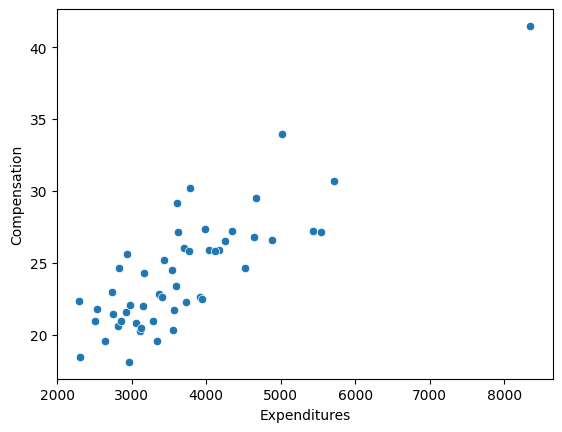

In [18]:
sns.scatterplot(x=df.Expenditures, y=df.Compensation)

In [38]:
#estimativas dos prãmetros, erros padrã , r2, SQR, SQE
#Let's redefine the compensation and expenditures
#Y = compensation
#X = expenditures

In [44]:
df.rename(columns={"Compensation":"Y", "Expenditures":"X"}, inplace=True)

In [42]:
sum_Y = df.sum(axis=0)[1]
sum_X = df.sum(axis=0)[2]

mean_Y = df.mean(axis=0)[1]
mean_X = df.mean(axis=0)[2]

In [43]:
#define new columns
df['mean_Y'] = mean_Y
df['mean_X'] = mean_X

In [45]:
df['y'] = df['Y'] - df['mean_Y']
df['x'] = df['X'] - df['mean_X']

df['squared_x'] = df['x'] * df['x']
df['yx'] = df['y'] * df['x']

In [47]:
df.sum(axis=0)

Observação    1.326000e+03
Y             1.242167e+03
X             1.885270e+05
mean_Y        1.242167e+03
mean_X        1.885270e+05
y            -1.776357e-13
x             4.092726e-12
squared_x     5.562600e+07
yx            1.839877e+05
dtype: float64

In [49]:
#Estimativas dos parãmetros
beta2 = df.sum(axis=0)[8]/df.sum(axis=0)[7]
beta1 = df.mean(axis=0)[1] - (beta2 * df.mean(axis=0)[2])

In [50]:
beta2, beta1

(0.0033075850035964942, 12.129371020136547)

In [51]:
df['squared_X'] = df['X'] * df['X']
df['squared_Y'] = df['Y'] * df['Y']
df['hat_Y'] = beta1 + beta2 * df['X']
df['hat_u'] = df['Y'] - df['hat_Y']
df['squared_hat_u'] = df['hat_u'] * df['hat_u']

In [54]:
df.sum(axis=0)

Observação       1.326000e+03
Y                1.242167e+03
X                1.885270e+05
mean_Y           1.242167e+03
mean_X           1.885270e+05
y               -1.776357e-13
x                4.092726e-12
squared_x        5.562600e+07
yx               1.839877e+05
squared_X        7.525364e+08
squared_Y        3.112787e+04
hat_Y            1.242167e+03
hat_u           -1.847411e-13
squared_hat_u    2.648252e+02
dtype: float64

In [58]:
squared_hat_sigma = df.sum(axis=0)[13]/(len(df-2))

In [59]:
var_beta2 = squared_hat_sigma/df.sum(axis=0)[7]
ep_beta2 = var_beta2**0.5
var_beta1 = (df.sum(axis=0)[9]*squared_hat_sigma)/(len(df)*df.sum(axis=0)[7])
ep_beta1 = var_beta1**0.5

In [60]:
ep_beta2, ep_beta1

(0.00030553129362849917, 1.1736385394472684)